In [54]:
import matplotlib.pyplot as plt
from pymongo import MongoClient
import pandas as pd
from matplotlib import pyplot
import seaborn
import numpy as np

In [55]:
def create_df(document_list):
    location_list = []
    for d in document_list:
        location_list.append(d['location'])
    traffic_list = []
    for d in document_list:
        traffic_list.append(d['traffic'])
    datetime_list = []
    for d in document_list:
        datetime_list.append(d['datetime'])
    environment_list = []
    for d in document_list:
        environment_list.append(d['environment'])
    wd_list = []
    for d in document_list:
        wd_list.append(d['weekday'])
    station_list = []
    for d in document_list:
        station_list.append({'station id':d['location']['station']['id'], 'station location': d['location']['station']['station location']})
    
    location_df = pd.DataFrame.from_records(location_list)
    traffic_df = pd.DataFrame.from_records(traffic_list)
    environment_df = pd.DataFrame.from_records(environment_list)
    station_df = pd.DataFrame.from_records(station_list)
    new_df = pd.merge(location_df, traffic_df, right_index=True, left_index=True)
    new_df = pd.merge(new_df, environment_df, right_index=True, left_index=True)
    new_df = pd.merge(new_df, station_df, right_index=True, left_index=True)
    new_df['datetime'] = datetime_list
    new_df['weekday'] = wd_list
    
    return [new_df, location_df, traffic_df, environment_df, station_df]

In [56]:
client = MongoClient('localhost', 27017)
db = client.DataDb
collection = db.MilanTrafficAndPollution
cursor = collection.find({})
document_list = []
for document in cursor:
    document_list.append(document)

In [57]:
df_list = create_df(document_list)
df = df_list[0]
station_df = df_list[-1]

In [58]:
df.head()

,description,length,start point,end point,station,speed,speedUncapped,freeFlow,jamFactor,traversability,...,O3,SO2,Aqi,aqi level,pm 2.5,pm 10,station id,station location,datetime,weekday
0,Via Eritrea,1029.0,"[45.50902, 9.14808]","[45.51075, 9.1376]","{'id': 460336, 'station location': [45.4968315...",40.000003,40.000003,34.999999,0.0,open,...,2.744279,0.763359,87,Moderate,87,28,460336,"[45.496831549999996, 9.167650701677125]",2024-02-04 01:00:00,6
1,Lainate,1862.0,"[45.57173, 9.01591]","[45.56162, 9.03485]","{'id': 116353, 'station location': [45.4679729...",108.000000,108.000000,105.000005,0.0,open,...,2.744279,0.763359,25,Good,25,10,116353,"[45.4679729, 9.1235389]",2024-02-04 01:00:00,6
2,A4 - Torino Trieste,97.0,"[45.51447, 9.09862]","[45.51419, 9.09977]","{'id': 116353, 'station location': [45.4679729...",64.999998,64.999998,40.000003,0.0,open,...,2.744279,0.763359,25,Good,25,10,116353,"[45.4679729, 9.1235389]",2024-02-04 01:00:00,6
3,SP114-Cusago,3716.0,"[45.41276, 9.03626]","[45.44315, 9.02899]","{'id': 193501, 'station location': [45.4452809...",72.000000,72.000000,50.000000,0.0,open,...,3.575294,0.817885,32,Good,32,12,193501,"[45.4452809, 9.0937168]",2024-02-04 01:00:00,6
4,Via Luigi Nono incrocio Via Giulio Cesare Proc...,329.0,"[45.48675, 9.17499]","[45.48409, 9.17685]","{'id': 21373, 'station location': [45.4762915,...",34.999999,34.999999,30.000002,0.0,open,...,2.744279,0.763359,73,Moderate,73,22,21373,"[45.4762915, 9.1721766]",2024-02-04 01:00:00,6


In [59]:
df.describe()

,length,speed,speedUncapped,freeFlow,jamFactor,speedGap,temperature,relative humidity,rainfall,wind,...,NO2,CO,O3,SO2,Aqi,pm 2.5,pm 10,station id,datetime,weekday
count,344938.000000,344938.000000,344938.000000,344938.000000,344938.000000,344938.000000,344938.000000,344938.000000,344938.000000,344938.000000,...,344938.000000,344938.000000,344938.000000,344938.000000,344938.000000,344938.000000,344938.000000,344938.000000,344938,344938.000000
mean,966.683262,41.136797,42.853839,43.819511,0.959129,-0.965672,9.476012,86.324812,0.039894,6.606205,...,16.298758,1.145797,3.549739,1.560255,77.552070,77.537729,35.731531,188490.651476,2024-02-08 00:11:44.182200576,3.406806
min,10.000000,2.000000,2.000000,14.000000,0.000000,-95.000004,2.400000,59.000000,0.000000,0.000000,...,2.511820,0.550725,0.000000,0.272628,2.000000,1.000000,1.000000,21373.000000,2024-02-04 00:00:00,0.000000
25%,206.000000,25.000001,25.000001,30.000002,0.000000,-8.000000,8.700000,80.000000,0.000000,2.000000,...,9.801024,0.792673,1.507421,0.654308,36.000000,36.000000,13.000000,98497.000000,2024-02-06 00:00:00,2.000000
50%,569.000000,34.999999,36.000000,37.000001,0.100000,-1.000001,9.700000,90.000000,0.000000,5.000000,...,14.873916,1.098631,3.401361,1.526718,63.000000,63.000000,28.000000,116353.000000,2024-02-08 01:00:00,4.000000
75%,1208.000000,50.000000,51.000001,48.000002,1.600000,5.000000,10.700000,94.000000,0.000000,9.000000,...,21.572104,1.426329,5.333951,2.235551,123.000000,123.000000,53.000000,196504.000000,2024-02-10 00:00:00,6.000000
max,11131.000000,129.999996,168.000005,105.000005,9.900000,108.000000,15.400000,100.000000,2.400000,22.000000,...,40.484634,2.295894,8.658009,3.980371,213.000000,213.000000,140.000000,460762.000000,2024-02-11 23:00:00,6.000000
std,1195.449859,23.114863,25.862332,20.631837,1.448801,11.000059,2.591887,10.456291,0.233640,5.162766,...,8.544767,0.411781,2.403188,0.921873,52.193085,52.212434,28.046311,138284.191250,NaN,2.102189


##HOW MUCH WEATHER AFFECT TRAFFIC AND POLLUTION

In [60]:
#query per selezionare i due sottoinsiemi

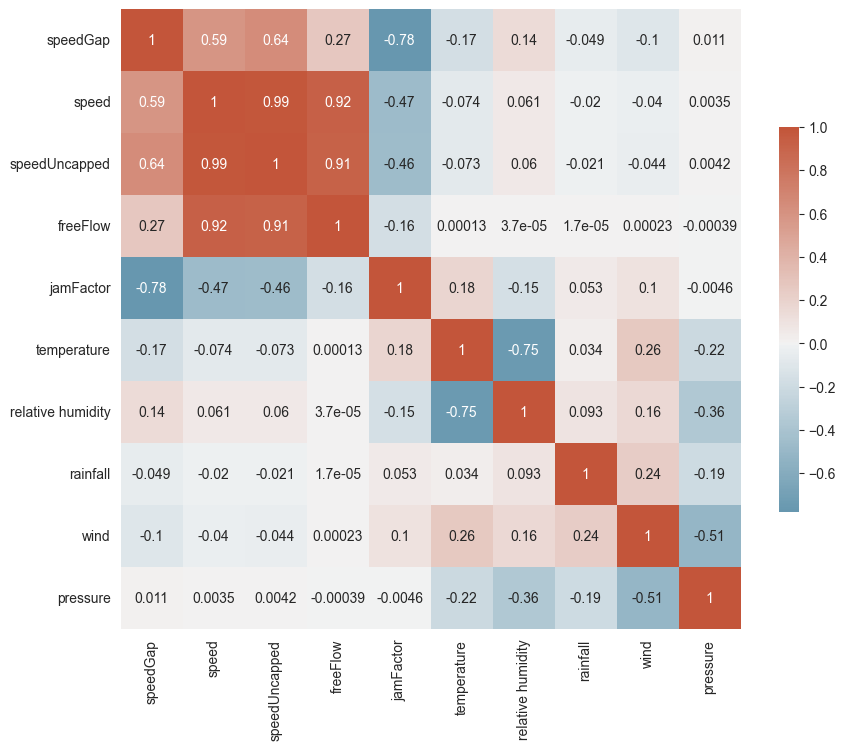

In [61]:
corr = df[['speedGap','speed', 'speedUncapped', 'freeFlow', 'jamFactor', 'temperature', 'relative humidity', 'rainfall', 'wind', 'pressure']].corr()
cmap = seaborn.diverging_palette(230, 20, as_cmap=True)
plt.figure(figsize=(10,10))
seaborn.heatmap(corr, cmap=cmap, center=0,
            square=True,annot=True, cbar_kws={"shrink": .5});

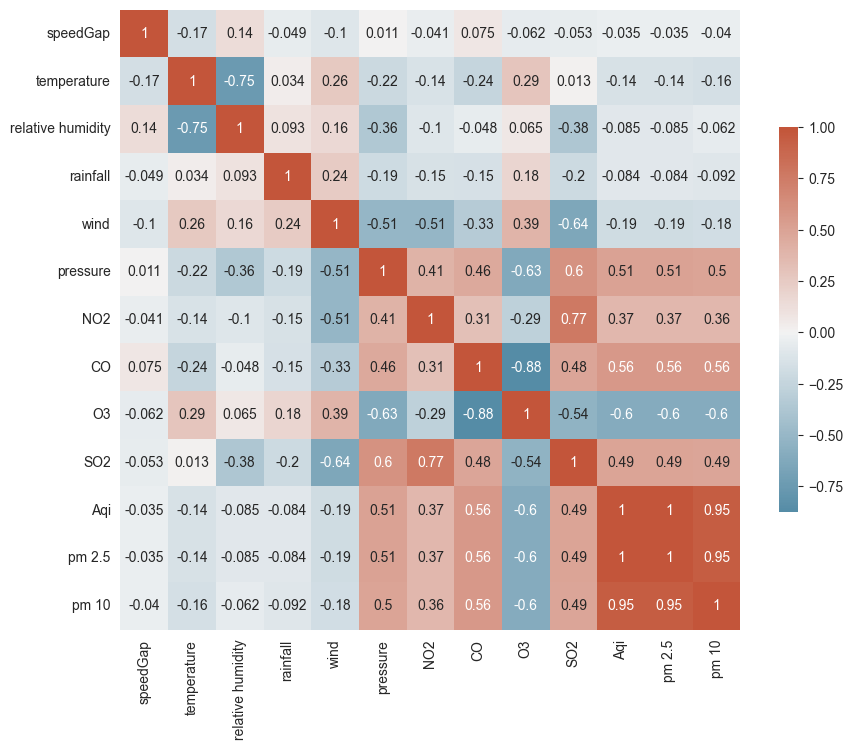

In [62]:
corr = df[['speedGap','temperature', 'relative humidity', 'rainfall', 'wind', 'pressure', 'NO2', 'CO', 'O3', 'SO2', 'Aqi','pm 2.5', 'pm 10']].corr()
cmap = seaborn.diverging_palette(230, 20, as_cmap=True)
plt.figure(figsize=(10,10))
seaborn.heatmap(corr, cmap=cmap, center=0,
            square=True,annot=True, cbar_kws={"shrink": .5});

##HOW THE TRAFFIC INFLUENCE THE POLLUTION AND WHAT POLLUTANTS ARE MORE RELATED TO VEHICOULAR TRAFFIC

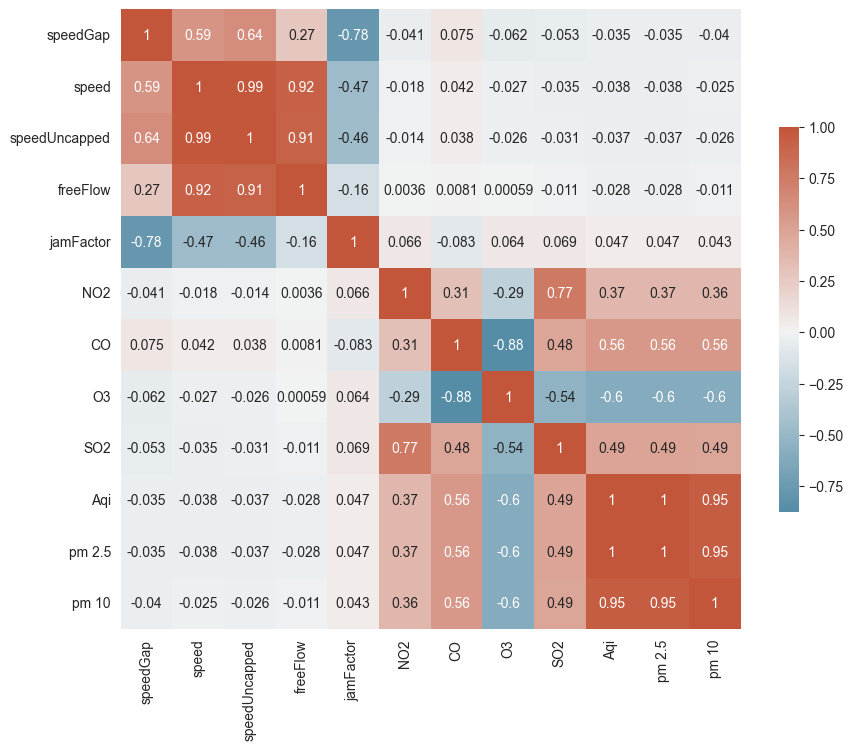

In [63]:
corr = df[['speedGap', 'speed', 'speedUncapped', 'freeFlow', 'jamFactor', 'NO2', 'CO', 'O3', 'SO2', 'Aqi','pm 2.5', 'pm 10']].corr()
cmap = seaborn.diverging_palette(230, 20, as_cmap=True)
plt.figure(figsize=(10,10))
seaborn.heatmap(corr, cmap=cmap, center=0,
            square=True,annot=True, cbar_kws={"shrink": .5});

C:\Users\gabri\AppData\Local\Temp\ipykernel_13904\1196223002.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grpd_df = df_tmp.groupby(['bins'])[['pm 2.5', 'pm 10', 'O3', 'CO', 'NO2', 'SO2']].mean()


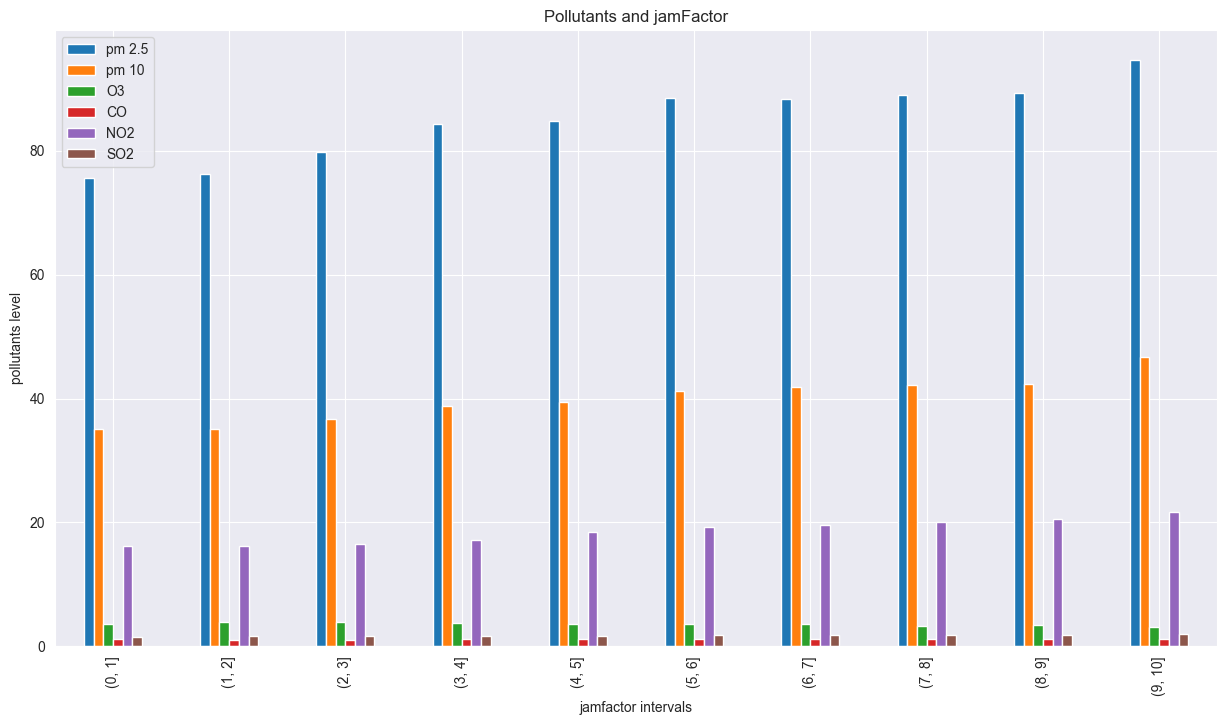

In [64]:
bins = [0,1,2,3,4,5,6,7,8,9,10]
df_tmp = df
df_tmp['bins'] = pd.cut(df.jamFactor, bins=bins)

grpd_df = df_tmp.groupby(['bins'])[['pm 2.5', 'pm 10', 'O3', 'CO', 'NO2', 'SO2']].mean()
grpd_df[['pm 2.5', 'pm 10', 'O3', 'CO', 'NO2', 'SO2']].plot(kind='bar',figsize=(15, 8))
plt.title("Pollutants and jamFactor")
plt.xlabel("jamfactor intervals")
plt.ylabel("pollutants level");

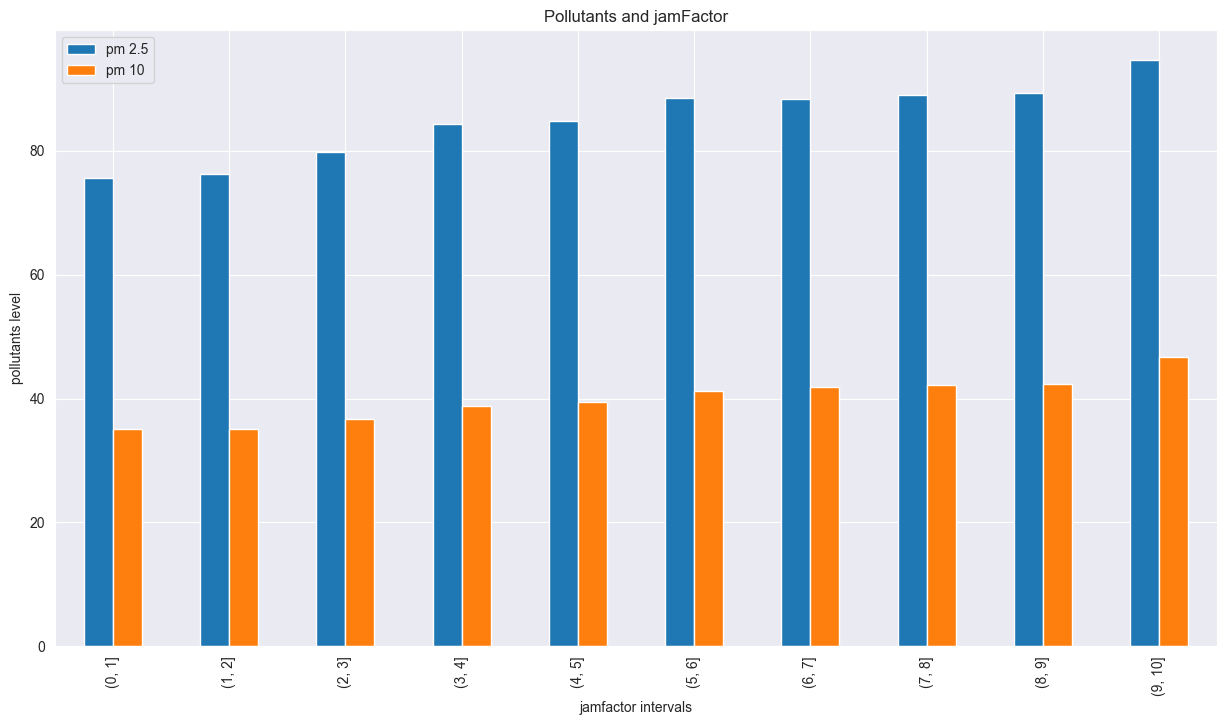

In [65]:

grpd_df[['pm 2.5', 'pm 10']].plot(kind='bar',figsize=(15, 8))
plt.title("Pollutants and jamFactor")
plt.xlabel("jamfactor intervals")
plt.ylabel("pollutants level");

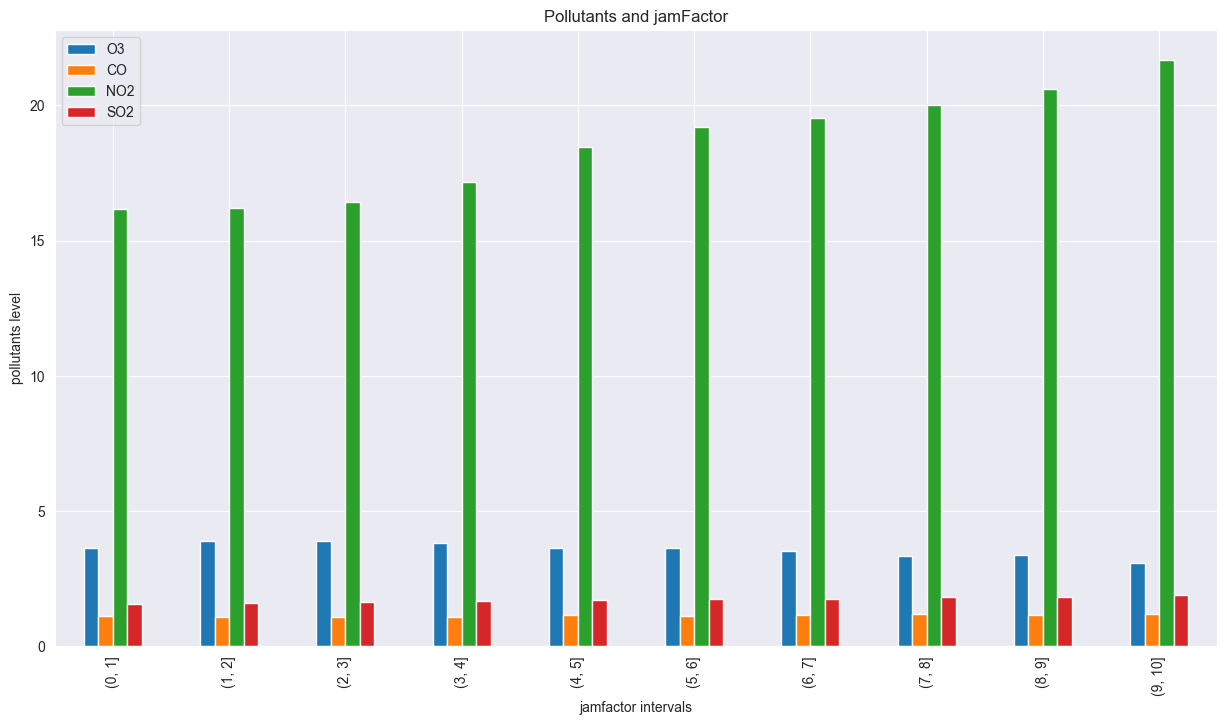

In [66]:
grpd_df[['O3', 'CO', 'NO2', 'SO2']].plot(kind='bar',figsize=(15, 8))
plt.title("Pollutants and jamFactor")
plt.xlabel("jamfactor intervals")
plt.ylabel("pollutants level");

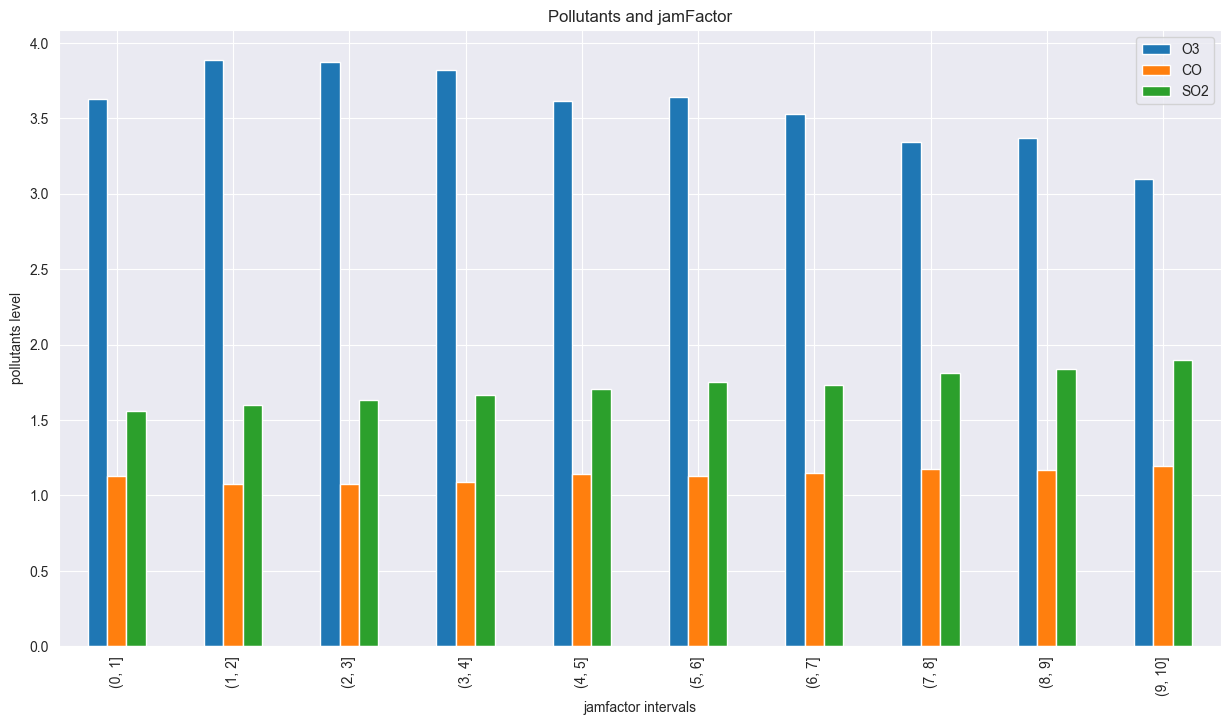

In [67]:
grpd_df[['O3', 'CO', 'SO2']].plot(kind='bar',figsize=(15, 8))
plt.title("Pollutants and jamFactor")
plt.xlabel("jamfactor intervals")
plt.ylabel("pollutants level");

In [68]:

cursor = (db.MilanTrafficAndPollution
          .find({"environment.rainfall":0, "environment.wind":{"$lt":2}, "environment.temperature":{"$lt": 10}}))
doc_list = []
for document in cursor:
    doc_list.append(document)

In [69]:
df_similar_weather = create_df(doc_list)[0]

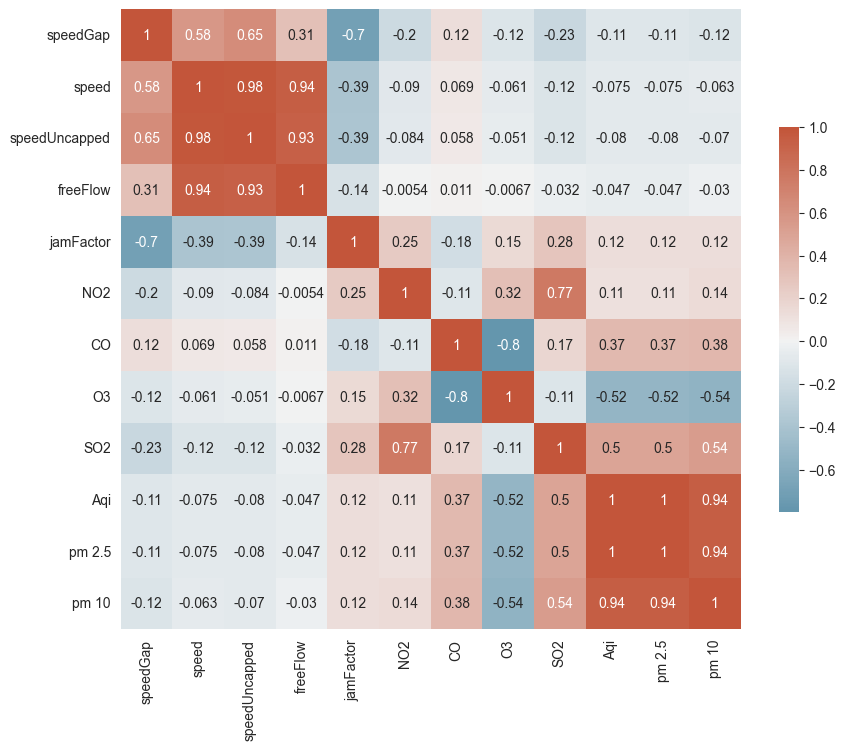

In [70]:
corr = df_similar_weather[['speedGap', 'speed', 'speedUncapped', 'freeFlow', 'jamFactor', 'NO2', 'CO', 'O3', 'SO2', 'Aqi','pm 2.5', 'pm 10']].corr()
cmap = seaborn.diverging_palette(230, 20, as_cmap=True)
plt.figure(figsize=(10,10))
seaborn.heatmap(corr, cmap=cmap, center=0,
            square=True,annot=True, cbar_kws={"shrink": .5});

##POLLUTION AND TRAFFIC IN SPACE AND TIME

In [72]:
df_tmp = df
df_tmp['hour'] = df_tmp['datetime'].apply(lambda x :x.time()) 

In [73]:
cursor = db.MilanTrafficAndPollution.aggregate([
    {
        '$group': {
            '_id': '$weekday', 
            'pm_25': {
                '$avg': '$environment.Aqi'
            }, 
            'pm10': {
                '$avg': '$environment.pm 10'
            }, 
            'O3': {
                '$avg': '$environment.O3'
            }, 
            'CO': {
                '$avg': '$environment.CO'
            }, 
            'NO2': {
                '$avg': '$environment.NO2'
            }, 
            'SO2': {
                '$avg': '$environment.SO2'
            }, 
            'jamFactor': {
                '$avg': '$traffic.jamFactor'
            }
        }
    }
])
doc_list = []
for document in cursor:
    doc_list.append(document)

In [74]:
df_grpd_weekday = pd.DataFrame.from_records(doc_list)
df_grpd_weekday = df_grpd_weekday.sort_values(by='_id').set_index('_id')
df_grpd_weekday

,pm_25,pm10,O3,CO,NO2,SO2,jamFactor
_id,,,,,,,
0,63.571656,27.006012,3.762238,0.977292,16.146661,1.532889,1.035847
1,153.622609,82.666402,1.696451,1.365220,21.774888,2.434384,1.011899
2,105.621144,50.964876,2.372338,1.409906,21.653638,2.390804,1.125335
3,77.989536,33.893121,2.037301,1.579687,22.496697,2.251315,1.119299
4,91.911273,43.827011,3.498930,1.190463,11.251066,0.585672,1.276332
5,22.153681,7.987160,7.572179,0.648566,6.961050,0.385325,0.885728
6,53.913799,20.369813,3.678043,0.996920,15.131079,1.461945,0.612714


In [75]:
cursor = db.MilanTrafficAndPollution.aggregate([
    {
        '$project': {
            'SO2': '$environment.SO2', 
            'CO': '$environment.CO', 
            'NO2': '$environment.NO2', 
            'O3': '$environment.O3', 
            'pm10': '$environment.pm 10', 
            'pm25': '$environment.Aqi', 
            'jamFactor': '$traffic.jamFactor', 
            'hour': {
                '$hour': '$datetime'
            }
        }
    }, {
        '$group': {
            '_id': '$hour', 
            'pm_25': {
                '$avg': '$pm25'
            }, 
            'pm10': {
                '$avg': '$pm10'
            }, 
            'O3': {
                '$avg': '$O3'
            }, 
            'CO': {
                '$avg': '$CO'
            }, 
            'NO2': {
                '$avg': '$NO2'
            }, 
            'SO2': {
                '$avg': '$SO2'
            }, 
            'jamFactor': {
                '$avg': '$jamFactor'
            }
        }
    }
])
doc_list = []
for document in cursor:
    doc_list.append(document)

In [76]:
time_grpd = pd.DataFrame.from_records(doc_list)
time_grpd = time_grpd.sort_values(by='_id').set_index('_id')
time_grpd

,pm_25,pm10,O3,CO,NO2,SO2,jamFactor
_id,,,,,,,
0,85.226557,39.944033,2.812330,1.374377,16.604652,1.304500,0.326907
1,85.368775,39.888762,2.297400,1.433801,14.881460,1.255653,0.191326
2,77.715641,37.585738,2.230629,1.464602,13.198926,1.242847,0.194450
3,80.673059,38.883327,2.292590,1.459902,11.872949,1.193896,0.189416
4,77.391465,36.077755,2.428835,1.420454,11.698305,1.160234,0.165571
5,78.040116,36.438382,2.556939,1.360887,12.476425,1.196098,0.239067
6,80.066354,37.361109,2.566461,1.342037,15.168332,1.524117,0.756386
7,78.940975,37.436745,2.707045,1.236417,19.339957,1.758741,1.753579
8,80.811895,39.240255,2.638992,1.197172,19.971891,1.905828,1.644892


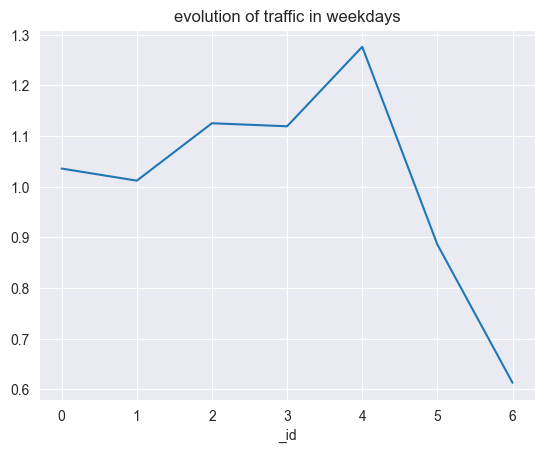

In [77]:
df_grpd_weekday['jamFactor'].plot(title='evolution of traffic in weekdays');

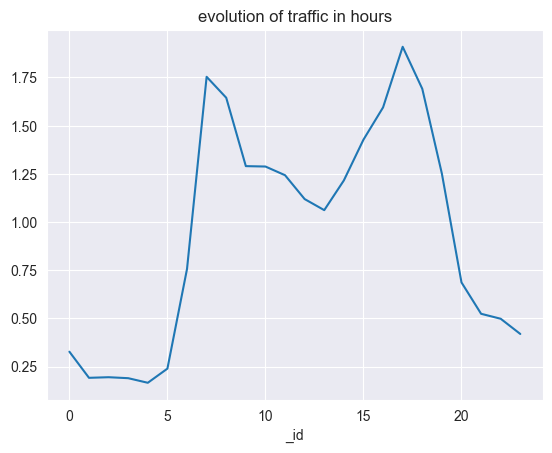

In [78]:
time_grpd['jamFactor'].plot(title='evolution of traffic in hours');

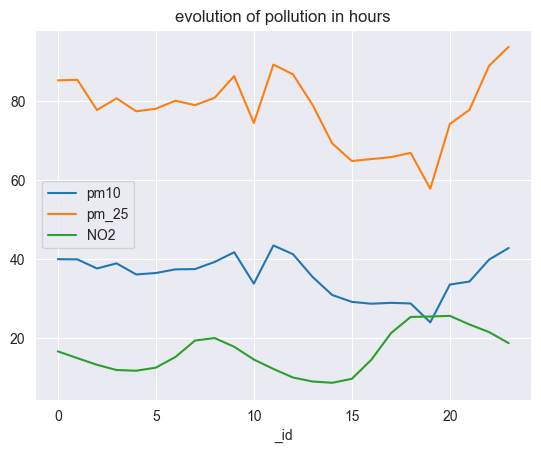

In [79]:
time_grpd[['pm10','pm_25','NO2']].plot(title='evolution of pollution in hours');

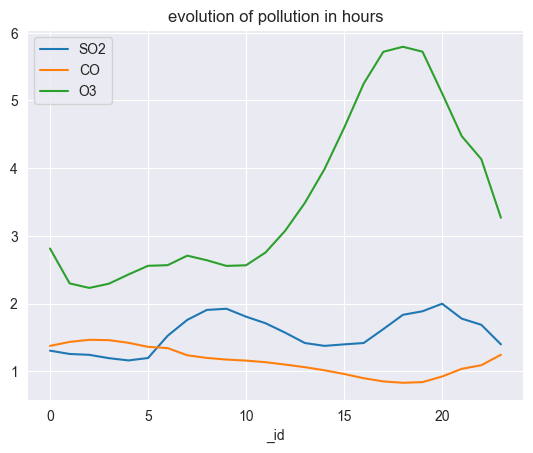

In [80]:
time_grpd[['SO2','CO','O3']].plot(title='evolution of pollution in hours');


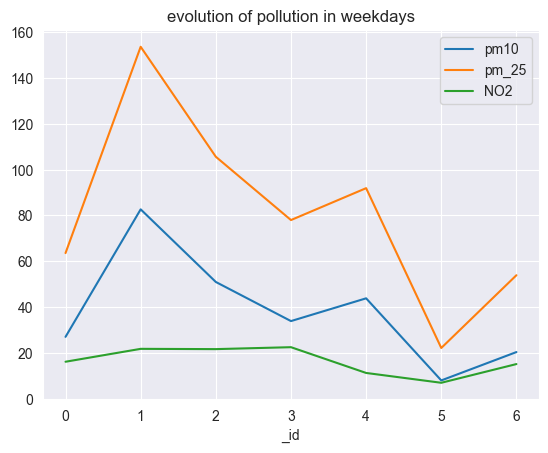

In [81]:
df_grpd_weekday[['pm10','pm_25','NO2']].plot(title='evolution of pollution in weekdays');

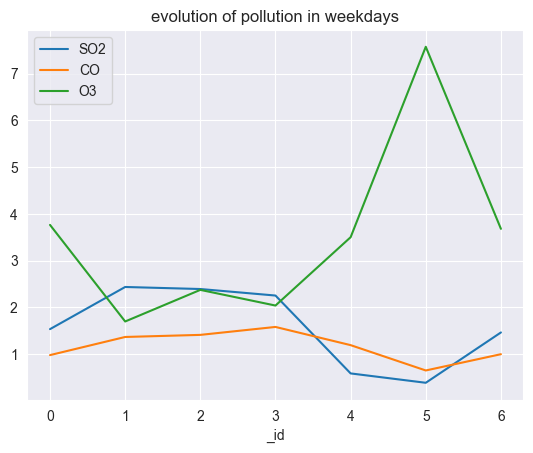

In [82]:
df_grpd_weekday[['SO2','CO','O3']].plot(title='evolution of pollution in weekdays');

In [83]:

cursor = db.MilanTrafficAndPollution.aggregate([
    {
        '$group': {
            '_id': '$location.station.id', 
            'speedGap': {
                '$avg': '$traffic.speedGap'
            }, 
            'speed': {
                '$avg': '$traffic.speed'
            }, 
            'speedUncapped': {
                '$avg': '$traffic.speedUncapped'
            }, 
            'freeFlow': {
                '$avg': '$traffic.freeFlow'
            }, 
            'jamFactor': {
                '$avg': '$traffic.jamFactor'
            }, 
            'NO2': {
                '$avg': '$environment.NO2'
            }, 
            'SO2': {
                '$avg': '$environment.SO2'
            }, 
            'O3': {
                '$avg': '$environment.O3'
            }, 
            'CO': {
                '$avg': '$environment.CO'
            }, 
            'Aqi': {
                '$avg': '$environment.Aqi'
            }, 
            'pm_10': {
                '$avg': '$environment.pm 10'
            }
        }
    }, {
        '$lookup': {
            'from': 'MilanTrafficAndPollution', 
            'localField': '_id', 
            'foreignField': 'location.station.id', 
            'as': 'station location'
        }
    }, {
        '$unwind': {
            'path': '$station location'
        }
    }, {
        '$project': {
            'speedGap': '$speedGap', 
            'speed': '$speed', 
            'speedUncapped': '$speedUncapped', 
            'jamFactor': '$jamFactor', 
            'freeFlow': '$freeFlow', 
            'NO2': '$NO2', 
            'O3': '$O3', 
            'SO2': '$SO2', 
            'CO': '$CO', 
            'Aqi': '$Aqi', 
            'pm_10': '$pm_10', 
            'station_location': '$station location.location.station.station location'
        }
    }
])
doc_list = []
for document in cursor:
    doc_list.append(document)

In [84]:
df_grpd_station = pd.DataFrame.from_records(doc_list)
df_grpd_station = df_grpd_station.drop_duplicates(subset=['_id']).set_index('_id').sort_values(by='Aqi')
df_grpd_station

,speedGap,speed,speedUncapped,jamFactor,freeFlow,NO2,O3,SO2,CO,Aqi,pm_10,station_location
_id,,,,,,,,,,,,
116353,1.123273,43.617720,45.482788,0.723129,44.359515,16.251227,3.550120,1.603058,1.131920,56.222356,28.632356,"[45.4679729, 9.1235389]"
98494,-2.878384,33.885800,36.018169,1.215109,38.896553,17.121739,3.512433,1.500041,1.179486,62.236559,22.607527,"[45.5396143, 9.2365339]"
246697,-3.914357,28.109667,28.360626,1.268380,32.274983,16.629856,3.459325,1.558565,1.161241,63.664677,34.239090,"[45.4429376, 9.2109626]"
193501,-0.764722,44.964739,46.690768,0.768240,47.455490,13.650873,3.917318,1.399891,1.118337,65.024139,30.784246,"[45.4452809, 9.0937168]"
98497,-1.364829,51.961440,55.088621,1.106587,56.453450,17.121628,3.513758,1.499922,1.179149,67.862139,33.589923,"[45.5452297, 9.2336167]"
156526,-2.174001,36.198009,37.113792,1.066715,39.287793,16.662850,3.457119,1.560771,1.161610,68.531884,30.309149,"[45.4831483, 9.2419983]"
98485,-3.236303,35.061033,35.682427,1.093146,38.918730,17.122414,3.512204,1.500125,1.179513,70.034943,36.058898,"[45.5255896, 9.2285405]"
69364,-5.277073,24.314123,24.363270,1.377241,29.640344,16.265447,3.547778,1.601188,1.132742,71.837100,43.130891,"[45.473702, 9.170685]"
107293,0.314621,55.564498,58.390453,0.853868,58.075832,17.120726,3.514455,1.499872,1.179103,72.408621,33.443650,"[45.5540815, 9.2603531]"


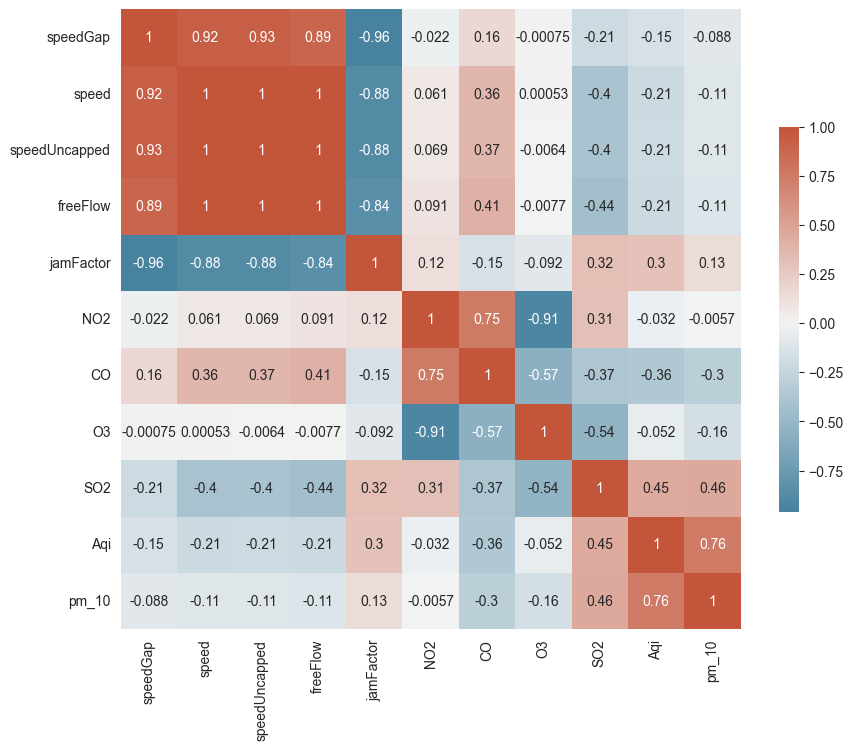

In [85]:
corr = df_grpd_station[['speedGap', 'speed', 'speedUncapped', 'freeFlow', 'jamFactor', 
                        'NO2', 'CO', 'O3', 'SO2', 'Aqi', 'pm_10']].corr()
cmap = seaborn.diverging_palette(230, 20, as_cmap=True)
plt.figure(figsize=(10,10))
seaborn.heatmap(corr, cmap=cmap, center=0,
            square=True,annot=True, cbar_kws={"shrink": .5});

In [86]:
import folium

milan = [45.4654219, 9.1859243]

milan_map = folium.Map(location=milan, zoom_start=11)

for ind, stat in df_grpd_station.iterrows():
    if stat['Aqi']<50:
        color = 'green'
    elif 100 >= stat['Aqi'] > 50:
        color = 'yellow'
    elif 150 >= stat['Aqi'] > 100:
        color = 'orange'
    elif 150 >= stat['Aqi'] > 200:
        color = 'red'
    elif stat['Aqi']>300:
        color = 'purple'
    else:
        color = 'maroon'
        
    milan_map.add_child(folium.features.CircleMarker(
        stat['station_location'],
        color= color,
        radius = 5,
        fill=True,
        fill_color=color,
        fill_opacity = 1
    ))

milan_map